In [11]:
%matplotlib inline

In [23]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (14, 8)

In [17]:
def get_prefixed_filename(prefix, filename):
    return filename if prefix is None else f'{prefix}_{filename}'

def load_simulation_results(name=None):
    filename = get_prefixed_filename(name, 'results.csv')
    return pd.read_csv(filename)

def load_sensitivity_results(variable, name=None):
    filename = get_prefixed_filename(name, f'{variable}_results.csv')
    return pd.read_csv(filename).set_index('parameter')

In [18]:
def barplot(sensitivity_df):
    CONF_COLUMN = '_conf'
    conf_cols = sensitivity_df.columns.str.contains(CONF_COLUMN)

    confs = sensitivity_df.loc[:, conf_cols]
    confs.columns = [c.replace(CONF_COLUMN, '') for c in confs.columns]

    df = sensitivity_df.loc[:, ~conf_cols]

    df.plot(kind='bar', yerr=confs, grid=True)

In [19]:
sdf1 = load_sensitivity_results('recovered')
sdf1

,ST,ST_conf,S1,S1_conf
parameter,,,,
mean_age,1.081913,1.109483,2.009341,2.390899
risk_age,0.010001,1.443765,0.029701,1.936327


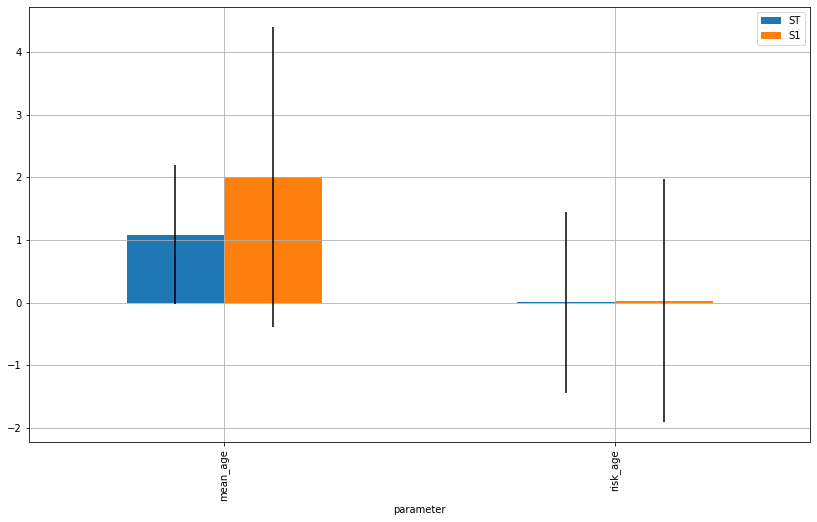

In [24]:
barplot(sdf1)